(np.float64(-0.5), np.float64(20805.5), np.float64(25186.5), np.float64(-0.5))

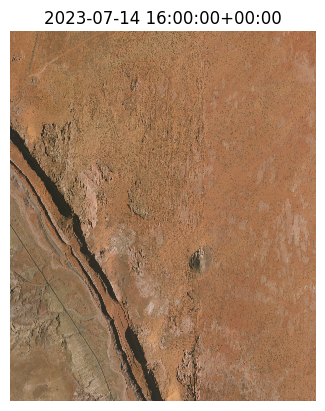

In [8]:
from pystac_client import Client
import planetary_computer
import matplotlib.pyplot as plt
import rasterio

# Connect to STAC
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",
                      modifier=planetary_computer.sign_inplace)

# Define point & time
bbox = [-111.3981, 36.2847, -111.35, 36.33]  # Arizona sample
search = catalog.search(collections=["naip"],
                        bbox=bbox, datetime="2023-01-01/2023-12-31")
items = list(search.get_all_items())

# Load the first item
item = items[0]
asset = item.assets["image"]
href = planetary_computer.sign(asset.href)
src = rasterio.open(href)
arr = src.read([1, 2, 3])
plt.imshow(arr.transpose(1, 2, 0))
plt.title(item.datetime); plt.axis("off")